In [1]:
import pickle
import numpy as np

In [28]:
import numpy as np
# plot stability vs # of models returned
epsilon = [0.01,0.03,0.05,0.1, 0.2,  0.3, 0.5, 0.7,0.95,1.0]
k = [1,2,3]
def stability_and_set_size(params, filepath):

    # store stability and set size for each parameter value
    stability = []
    set_size = []
    accuracy = []
    discounted_set_acc = []
    p_singleton = []

    for p in params:
        # load the results 
        res = np.load(filepath.format(p))
        stability.append(np.max(1-res[:,0])) # stability
        set_size.append(np.mean(res[:,1])) # set size
        p_singleton.append(np.mean(res[:,1] == 1))
        accuracy.append(np.mean(res[:,3]))
        discounted_set_acc.append(np.mean(res[:,3]*1/res[:,1]))
        print(p, np.mean(res[:,3]), np.mean(res[:,1]), np.mean(res[:,3])/np.mean(res[:,1]))
    return stability, set_size, accuracy, discounted_set_acc, p_singleton

eps_filepath = "results/clustering_elbow/bootstrap_kmeans_selection_method_inflated_argmax_epsilon{}_kNone_tolNoneB10000.npy"
eps_stability, eps_set_size, eps_acc, eps_disc, eps_sing = stability_and_set_size(epsilon, eps_filepath)

k_filepath = "results/clustering_elbow/bootstrap_kmeans_selection_method_top_k_epsilonNone_k{}_tolNoneB10000.npy"
k_stability, k_set_size, k_acc, k_disc, k_sing = stability_and_set_size(k, k_filepath)

bootstrap_filepath = "results/clustering_elbow/bootstrap_kmeans_selection_method_top_k_epsilonNone_k1_tolNoneB10000.npy"
bootstrap = np.load(bootstrap_filepath)
bootstrap_stability = (1- bootstrap[:,0]).max()
bootstrap_set_size = np.median(bootstrap[:,1])
bootstrap_disc = (bootstrap[:,3]*1/bootstrap[:,1]).mean()
bootstrap_acc = (bootstrap[:,3]).mean()

base_filepath = "results/clustering_elbow/kmeans_selection_method_top_k_epsilonNone_k1_tolNoneBNone.npy"
base = np.load(base_filepath)
base_stability = (1- base[:,0]).max()
base_set_size = np.median(base[:,1])
base_disc = (base[:,3]*1/base[:,1]).mean()
base_acc = (base[:,3]).mean()

0.01 0.64 1.0 0.64
0.03 0.65 1.03 0.6310679611650486
0.05 0.65 1.05 0.6190476190476191
0.1 0.67 1.07 0.6261682242990654
0.2 0.69 1.11 0.6216216216216215
0.3 0.72 1.18 0.6101694915254238
0.5 0.76 1.28 0.59375
0.7 0.86 1.49 0.5771812080536912
0.95 0.91 2.08 0.4375
1.0 0.91 2.2 0.41363636363636364
1 0.64 1.0 0.64
2 0.94 1.99 0.4723618090452261
3 0.99 2.81 0.35231316725978645


<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\e'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:58: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\l'
<>:74: SyntaxWarning: invalid escape sequence '\l'
<>:75: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:13: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid e

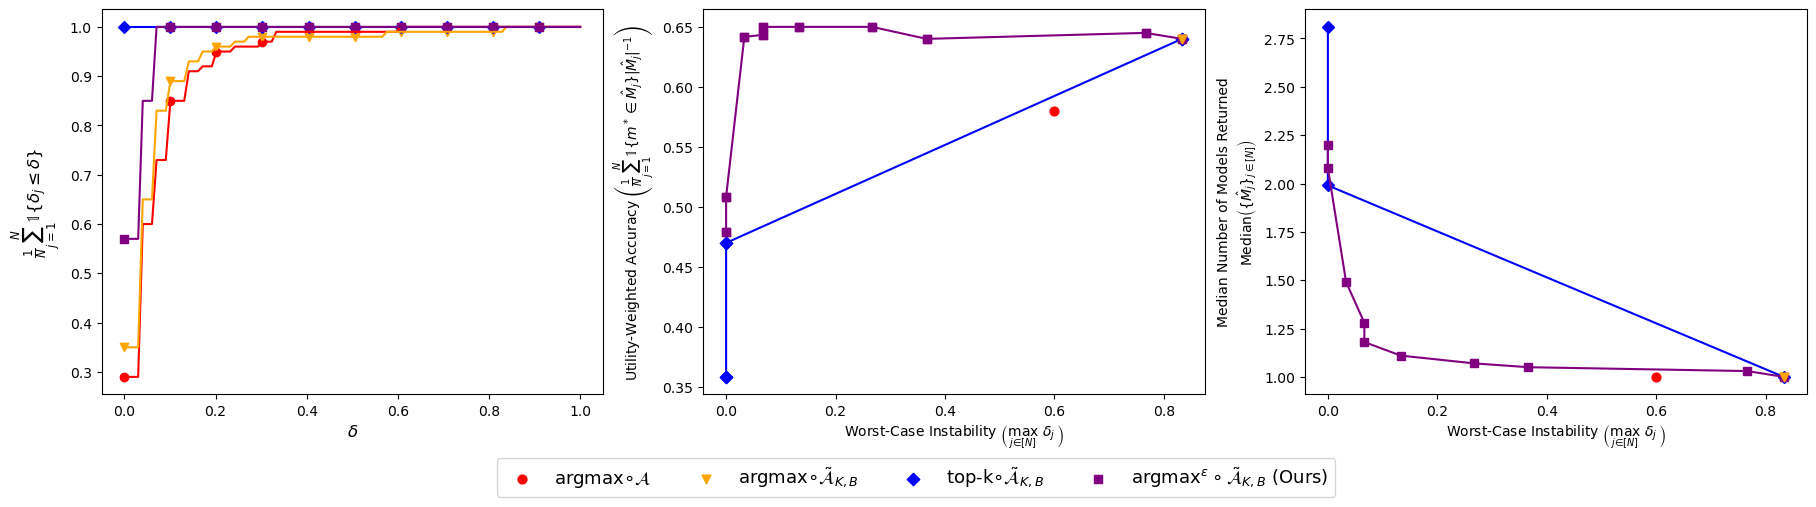

In [31]:
result_path = "results/clustering_elbow"
tol = 0.63
filenames = [result_path + "/kmeans_selection_method_top_k_epsilonNone_k1_tolNoneBNone.npy",
             result_path + "/bootstrap_kmeans_selection_method_top_k_epsilonNone_k1_tolNoneB10000.npy",
             result_path + "/bootstrap_kmeans_selection_method_top_k_epsilonNone_k2_tolNoneB10000.npy",
             result_path + "/bootstrap_kmeans_selection_method_inflated_argmax_epsilon0.3_kNone_tolNoneB10000.npy",
             ]
import numpy as np
import matplotlib.pyplot as plt
colors = ["red", "orange", "blue", "purple" ]
labels = ["argmax$\circ  \mathcal{A}$", 
          "argmax$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "top-2$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "argmax$^{0.3} \circ  \\tilde{\mathcal{A}}_{K,B}$ (Ours)" 
          ]
labels_general = ["argmax$\circ  \mathcal{A}$", 
          "argmax$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "top-k$\circ  \\tilde{\mathcal{A}}_{K,B}$", 
          "argmax$^\epsilon \circ  \\tilde{\mathcal{A}}_{K,B}$ (Ours)" 
          ]
markers = ["o", "v", "D","s" ]

def percent_by_delta(res, deltas):
    stability_res = 1-res
    ge_delta = [np.mean(stability_res <= deltas[d]) for d in range(len(deltas))]
    return ge_delta

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(22)


deltas = np.linspace(0,1,100)
for i in range(len(filenames)):
    f   = np.load(filenames[i])
    lst = percent_by_delta(f[:,0], deltas)
    ax1.plot(deltas, lst, c = colors[i])
    if i in [2,3,4]:
        ax1.scatter(deltas[::10], lst[::10], c = colors[i], marker=markers[i], label = labels[i])
    else:
        ax1.scatter(deltas[::10], lst[::10], c = colors[i], marker=markers[i])
ax1.set_xlabel("$\delta$", size = 12)
ax1.set_ylabel("$\\frac{1}{N}\sum_{j=1}^N \mathbb{1}\{\delta_j \leq \delta \} $", size = 12)



zorder = [10,10,4,5,4]
discount = [base_disc, bootstrap_disc, k_disc, eps_disc]
stabilities = [[base_stability], [bootstrap_stability], k_stability, eps_stability]

for i in range(len(markers)):
    if i == 1 or i==0:
        ax2.scatter(stabilities[i], discount[i], marker = markers[i], label = labels_general[i], c = colors[i],s =40, zorder=zorder[i])
    else:
        ax2.scatter(stabilities[i], discount[i], marker = markers[i], label = labels_general[i], c = colors[i], zorder = zorder[i],s =40)
        ax2.plot(stabilities[i], discount[i], marker = markers[i], c = colors[i], zorder = zorder[i])
ax2.set_xlabel("Worst-Case Instability $\left(\max_{j\in[N]} \ \delta_j\\right)$")
ax2.set_ylabel("Utility-Weighted Accuracy $\left(\\frac{1}{N}\sum_{j=1}^N \mathbb{1}\{m^* \in \hat M_j\} |\hat M_j|^{-1}\\right)$")
ax2.legend(loc = "lower left", ncol=len(labels), bbox_to_anchor=(-0.43, -0.29, 0.25, 0.25), prop={'size': 13})



zorder = [10,10,4,5,4]
set_sizes = [[base_set_size], [bootstrap_set_size], k_set_size, eps_set_size]

for i in range(len(markers)):
    if i == 1 or i==0:
        ax3.scatter(stabilities[i], set_sizes[i], marker = markers[i], label = labels_general[i], c = colors[i],s =40, zorder=zorder[i])
    else:
        ax3.plot(stabilities[i], set_sizes[i], marker = markers[i], label = labels_general[i], c = colors[i], zorder = zorder[i])#,s =40)
ax3.set_xlabel("Worst-Case Instability $\left(\max_{j\in[N]} \  \delta_j\\right)$")
ax3.set_ylabel("Median Number of Models Returned\nMedian$\left(\{\hat M_j\}_{j \in [N]}\\right)$")
plt.savefig("figures/kmeans_results_max.png", dpi = 300, bbox_inches= "tight")


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
np.random.seed(34)
rng = np.random.RandomState()

n1 = 5
n2 = 5
n3 = 20
n4=0

cluster1 = rng.normal(loc=1.5, scale=1, size=(n1, 2))
cluster2 = rng.normal(loc=3.5, scale=1, size=(n2, 2))

cluster3 = rng.normal(loc=2.5, scale=0.3, size=(n3, 2))


X = np.vstack([cluster1, cluster2, cluster3])

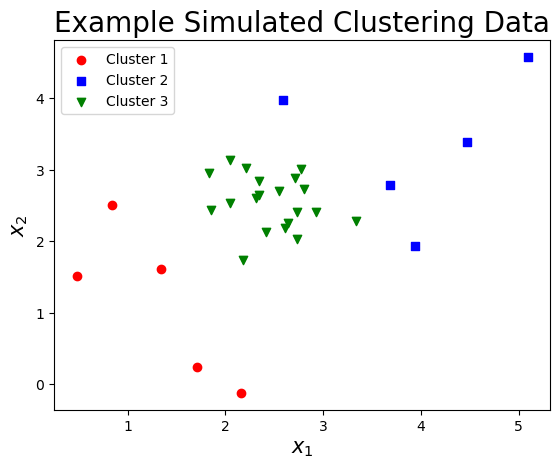

In [73]:
import matplotlib.pyplot as plt
import numpy as np
classes = np.concatenate((np.repeat([1],5), np.repeat([2],5), np.repeat([3], 20)))
plt.scatter(cluster1[:,0], cluster1[:,1], c = 'red', label = "Cluster 1")
plt.scatter(cluster2[:,0], cluster2[:,1], c = 'blue', label = "Cluster 2", marker = 's')
plt.scatter(cluster3[:,0], cluster3[:,1], c = 'green', label = "Cluster 3", marker = 'v')
plt.ylabel("$x_2$", size = 15)
plt.xlabel("$x_1$", size =15)
plt.title("Example Simulated Clustering Data", size = 20)
plt.legend()
plt.savefig("figures/example_kmeans_data.png", bbox_inches = 'tight', dpi = 300)